In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv('naver_webtoon_id.csv')
df = df.iloc[:,1:]
print(df.shape)

(32142, 343)


In [3]:
df.head()

,인생존망,뷰티풀 군바리,윈드브레이커,소녀의 세계,백수세끼,파이게임,장씨세가 호위무사,앵무살수,야자괴담,유일무이 로맨스,...,오늘도 사랑하세요,죽여주는 탐정님,그녀의 버킷리스트,만찢남녀,Here U Are,위험한 신입사원,불발소년,선녀야 야옹해봐!,8월의 눈보라,마도
0,박태준 / 전선욱,설이 / 윤성원,조용석,모랑지,치즈,배진수,조형근 / 김인호,김성진,이도광,두부,...,하찌,뻥 / 조은,황양 / 솦,님니,D JUN,박수정 / Jiya,곤세,햄톨탱크,김리아,이밤
1,"['에피소드, 액션']","['스토리, 드라마']","['스토리, 스포츠']","['스토리, 드라마']","['스토리, 드라마']","['스토리, 스릴러']","['스토리, 시대극']","['스토리, 판타지']","['옴니버스, 스릴러']","['스토리, 로맨스']",...,"['스토리, 로맨스']","['스토리, 스릴러']","['스토리, 드라마']","['스토리, 로맨스']","['스토리, 로맨스']","['스토리, 로맨스']","['에피소드, 드라마']","['스토리, 로맨스']","['스토리, 로맨스']","['스토리, 판타지']"
2,9.848,9.675999999999998,9.153000000000002,9.916,9.842000000000002,9.946666666666667,9.969,9.974,9.965,9.983,...,9.619000000000002,9.861999999999998,9.944999999999999,9.951000000000002,9.897,9.572999999999999,9.858,9.697,9.55,9.769
3,qaz1****,wlsg****,2sil****,wink****,nams****,plew****,udp1****,dhth****,anit****,pjsb****,...,tjsg****,minj****,jujc****,qaz3****,heen****,theh****,hbho****,xzcx****,lsja****,pott****
4,jkdd****,euns****,john****,euns****,yfn0****,wotn****,jss9****,qowe****,kkt3****,kjin****,...,chsp****,cril****,choi****,cyj1****,1hya****,ljy0****,hyun****,ghkd****,sjmj****,kinu****


In [43]:
# 웹툰 작가님 명, 장르, 평점 제외
df_value = df.iloc[3:,:]

# 유저별 dictionary형태로 가공
idlst={}
col = list(df.columns)
for k in range(len(col)):
    id_val = list(df_value[col[k]].values)
    print('iter',k+1, ': ',col[k])
    total = tqdm_notebook(range(len(id_val)))
    
    for b in total:
        if(id_val[b] not in list(idlst.keys())):
            idlst[id_val[b]] = col[k]
    print('length : ', len(list(idlst.keys())))
    
    # 너무 많은 데이터를 처리하기엔 한계가 있으므로 각 웹툰당 최대 50,000개 유저만 가져옴
    if(len(list(idlst.keys()))>=50000):
        print('50000 end')
        break

iter 1 :  인생존망



length :  18829
iter 2 :  뷰티풀 군바리



length :  36529
iter 3 :  윈드브레이커



length :  43660
iter 4 :  소녀의 세계



length :  49632
iter 5 :  백수세끼



length :  50751
50000 end


In [47]:
for i in range(len(col)):
    id_val = list(df_value[col[i]].values)
    
    print('iter',i+1, ': ',col[i])
    total = tqdm_notebook(range(len(id_val)))
    for j in total:
        
        if(id_val[j] in idlst.keys()):
            already_in_key = idlst[id_val[j]]+'split'+col[i]
            idlst[id_val[j]] = already_in_key

iter 1 :  인생존망



iter 2 :  뷰티풀 군바리



iter 3 :  윈드브레이커



iter 4 :  소녀의 세계


KeyboardInterrupt: 

In [57]:
lst = list(idlst.keys())
val = list(idlst.values())

In [58]:
a={'id':lst,'webtoon':val}
b=pd.DataFrame(a)

In [60]:
b.to_csv('naver_webtoon_watch.csv',mode='w')

In [35]:
df2 = pd.read_csv('naver_webtoon_watch.csv')
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import surprise

scaler=MinMaxScaler()


watched_toon = []


for i in range(len(df2)):
    box = Counter(list(df2['webtoon'])[i].split('split'))
    plus = []
    
    for j in df.columns:
        if(j in  box.keys()):
            if(box[j]==1):
                plus.append(3)
            elif(box[j]>1 and box[j]<4):
                plus.append(4)
            elif(box[j]>=4):
                plus.append(5)
        else:
            plus.append(0)
    
    watched_toon.append(plus)

In [42]:
user = pd.DataFrame(watched_toon,columns = df.columns)

In [43]:
user

,인생존망,뷰티풀 군바리,윈드브레이커,소녀의 세계,백수세끼,파이게임,장씨세가 호위무사,앵무살수,야자괴담,유일무이 로맨스,...,오늘도 사랑하세요,죽여주는 탐정님,그녀의 버킷리스트,만찢남녀,Here U Are,위험한 신입사원,불발소년,선녀야 야옹해봐!,8월의 눈보라,마도
0,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,4,5,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,4,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50746,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50747,0,0,0,0,4,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
50748,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50749,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check_unwatched=[]

for i in user.columns:
    if(sum(list(user[i]))==0):
        check_unwatched.append(i)

In [ ]:
check_unwatched

In [39]:
check_num_rating_user = []
check_one_rating = []
for j in range(len(user)):
    check_num_rating_user.append(len(user.columns) - list(user.iloc[j,:]).count(0))
    if(check_num_rating_user[-1]<=101 or check_num_rating_user[-1] > 150):
        check_one_rating.append(j)

In [14]:
print(min(check_num_rating_user))
print(max(check_num_rating_user))

1
343


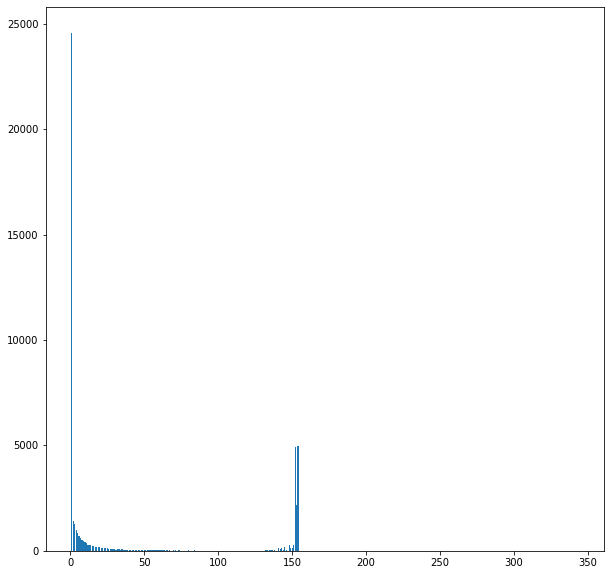

In [15]:
import matplotlib.pyplot as plt

graph = Counter(sorted(check_num_rating_user))

plt.figure(figsize=(10,10))
plt.bar(graph.keys(),graph.values())
plt.show()

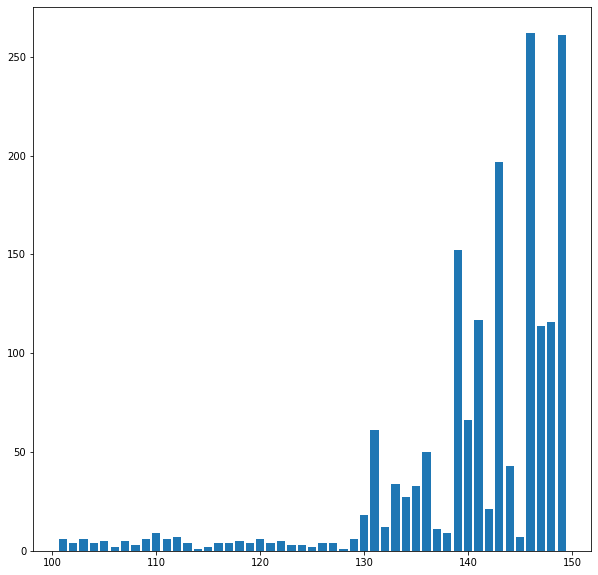

In [31]:
plt.figure(figsize=(10,10))
plt.bar([i for i in range(101,150)],list(graph.values())[101:150])
plt.show()

In [45]:
user = user.drop(check_one_rating)
user_copy = user.copy()
user = user.reset_index()
user = user.drop('index',axis=1)

In [56]:
id_dic = {}

for i in range(len(user_copy.index)):
    id_dic[i] = df2['id'].iloc[user_copy.index[i]]

In [72]:
user

,인생존망,뷰티풀 군바리,윈드브레이커,소녀의 세계,백수세끼,파이게임,장씨세가 호위무사,앵무살수,야자괴담,유일무이 로맨스,...,오늘도 사랑하세요,죽여주는 탐정님,그녀의 버킷리스트,만찢남녀,Here U Are,위험한 신입사원,불발소년,선녀야 야옹해봐!,8월의 눈보라,마도
0,5,0,5,5,5,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
1,5,4,4,4,4,5,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,5,5,5,5,5,0,4,4,0,0,...,3,0,0,0,3,0,0,0,0,0
3,5,4,0,0,5,0,0,0,4,0,...,4,0,0,0,3,3,0,3,0,0
4,5,0,5,4,5,4,4,0,0,0,...,3,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,0,0,5,5,4,5,5,0,0,0,...,4,0,0,0,4,0,0,0,0,4
1471,0,0,5,5,4,4,0,4,4,5,...,4,3,0,0,0,0,0,3,0,0
1472,0,0,0,5,0,0,0,0,0,4,...,4,0,0,3,3,3,0,0,0,0
1473,0,0,0,5,4,0,0,0,5,5,...,4,0,4,0,0,0,0,3,0,0


In [18]:
box1 = []
total = tqdm_notebook(range(len(user)))
for i in total:
    box2 = []
    for j in range(len(user.columns)):
        if(user.iloc[i,j]!=0):
            box2.append(i)
            box2.append(j)
            box2.append(user.iloc[i,j])
        if(len(box2)!=0):    
            box1.append(box2)
        box2 = []


In [19]:
user = pd.DataFrame(box1,columns=['id','webtoon','rating'])

In [20]:
user

,id,webtoon,rating
0,0,0,5
1,0,2,5
2,0,3,5
3,0,4,5
4,0,11,4
...,...,...,...
208553,1474,322,3
208554,1474,323,4
208555,1474,324,4
208556,1474,336,3


In [21]:
reader = surprise.Reader(rating_scale=(3,5))

In [22]:
data = surprise.Dataset.load_from_df(user,reader)

In [23]:
train = data.build_full_trainset()

option = {'name':'pearson'}

algo = surprise.KNNBasic(sim_option = option)

algo.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [69]:
recommend = algo.get_neighbors(0, k=5)
recommend

[181, 182, 183, 184, 186]

In [64]:
webtoon_dic = {}
for i in range(len(df.columns)):
    webtoon_dic[i] = list(df.columns)[i]
    
id_dic = {}
for i in range(len(user_copy.index)):
    id_dic[df2['id'].iloc[user_copy.index[i]]] = i

In [78]:
def webtoon_recommendation(id_dic, webtoon_dic):

    id_num = input(str('ID 입력:')[:8])

    recommend = algo.get_neighbors(id_dic[id_num], k=5)
    print('\n')
    print('***********************************************')
    for i in range(len(recommend)):
        print(i+1,'번째 추천 :', webtoon_dic[recommend[i]])
    print('***********************************************')
    
    return None

In [93]:
webtoon_recommendation(id_dic, webtoon_dic)

ID 입력:eunh****


***********************************************
1 번째 추천 : 셧업앤댄스
2 번째 추천 : 별을 삼킨 너에게
3 번째 추천 : 안개무덤
4 번째 추천 : 로그아웃
5 번째 추천 : 롤랑롤랑
***********************************************
